# CAPSTONE PROJECT - CREDIT CARD FRAUD DETECTION


## Project Description.

The digital transactions through credit/debit cards have increases considerably in thelast couple of years. Many people have resorted to using the cards for various purchases online to get away from the hassle of physically going to the store and using hard cash for the payment. Eventhough the usage of credit cards have increases which is good, along with it the number of fradulant trasactions have also increased. Hence it has become a necessity to identify these fraudulant transactions so that it doesnt become a liability to the card company as well as the card user. 

## Goal of the Project.

The goal of this project is to build a machine learning model that is capable of identifying these fraudulant transactions. 

There are various machine learning algorithms present that would satisfy this use case scenario. As part of this project, we will create couple of models on various algorithms like Random Forest, XGBOOST, simple logistic regression and we will look at the performance metrics of all these models run with different hyperparameters. Based on all these performance metrics we will recommend the best model which is good in predicting the fraudulent transactions. 

For this project, we will not be just considering the 'ACCURACY' performance metric as we have a severe case of data imbalance. Instead we will look at the AUC-ROC metric which gives us a good distinction on the predictions. Furthermore we will consider the RECALL metric after the model building to see how the model is capable of predicting the fraudulant transactions correctly. 

In order to handle the issue of class imbalance we will use SMOTE and ADASYN techniques to solve that problem. Initially we will use the class_weight=balanced option which will do the UNIFORM balancing internally. Then we will use SMOTE and ADASYN techniques.  

In [112]:
# Importing Libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn important libraries
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


# for modelling
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# for balancing dataset by oversampling
from imblearn.over_sampling import SMOTE, ADASYN

# for performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import auc, roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

## Exploratory data analysis

In [113]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
#observe the different feature type present in the data

print('********The shape of the dataset********')
print(df.shape)
print('********The columns present in the dataset*************')
print(df.columns)
print('*********The information of the columns******************')
print(df.info())

********The shape of the dataset********
(284807, 31)
********The columns present in the dataset*************
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
*********The information of the columns******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       2848

Here we will observe the distribution of our classes

In [115]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [116]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


Here we can clearly see that the data in highly imbalanced with Class 1(Fraud cases) extremely low with a value of 0.17% of the total data points whereas non-fraudulant (Class0) cases with 99.8% of the total data. 

Hence it is extremely important to treat the dataset for imbalance classes before finalizing a model as it will have an impact in the model predictability.

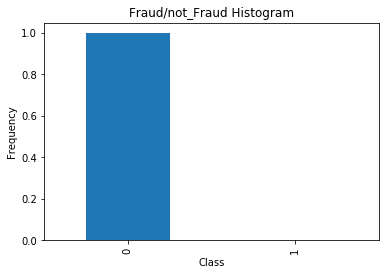

In [117]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

df.Class.value_counts(normalize=True).plot.bar()
plt.title("Fraud/not_Fraud Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

From the above bar graoh we can see that we have an extreme case of class imbalance where 99.8% of transactions are non-fraud whereas 0.17% are fraud transactions.

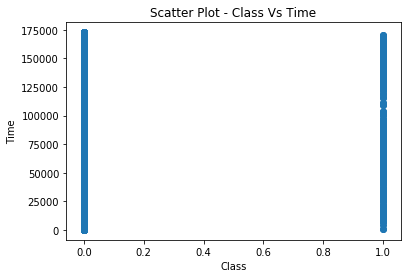

In [118]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(x=df['Class'],y=df['Time'])
plt.title('Scatter Plot - Class Vs Time')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

From the above scatter plot between Class and Time variable, we can see that there are quite number of time based transactions in both the classes. For instance in the Class 0, the time taken between the first transaction and the subsequent transactions range from 0 sec to 175K sec which is nearly 2 days. 

Similarly, for class 1 which contains the limited number of data, the time again varies between 0 sec and 2 days between first transaction and the subsequent transaction. 

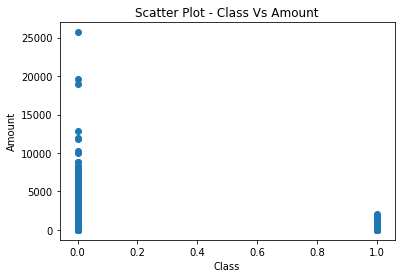

In [119]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(x=df['Class'],y=df['Amount'])
plt.title('Scatter Plot - Class Vs Amount')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

From the above scatter plot between the Class and the Amount variable, we can see that the transaction amount lies between 0 and 25K Euro.Whereas, when we look at the class 1 variable, we see that the transaction amount ranges between 0 and 5000 euros in case of fraudulent transactions.  

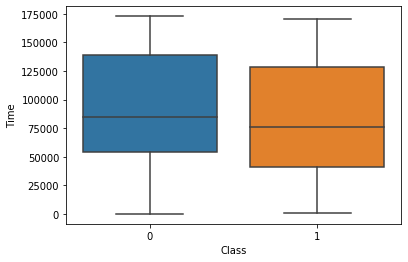

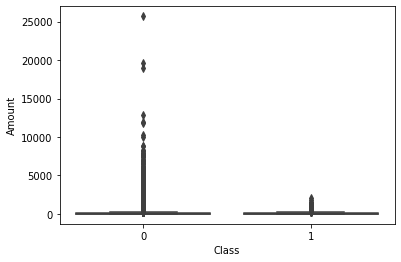

In [120]:
# BiVariate Analysis of the variables - Amount,Time w.r.t the target variable Class1 or Class0

bivariate_variables=['Time','Amount']

for i in bivariate_variables:

#     plt.subplot(1,2,1)
    sns.boxplot(y=df[i],x=df['Class'],data=df)
    plt.show()

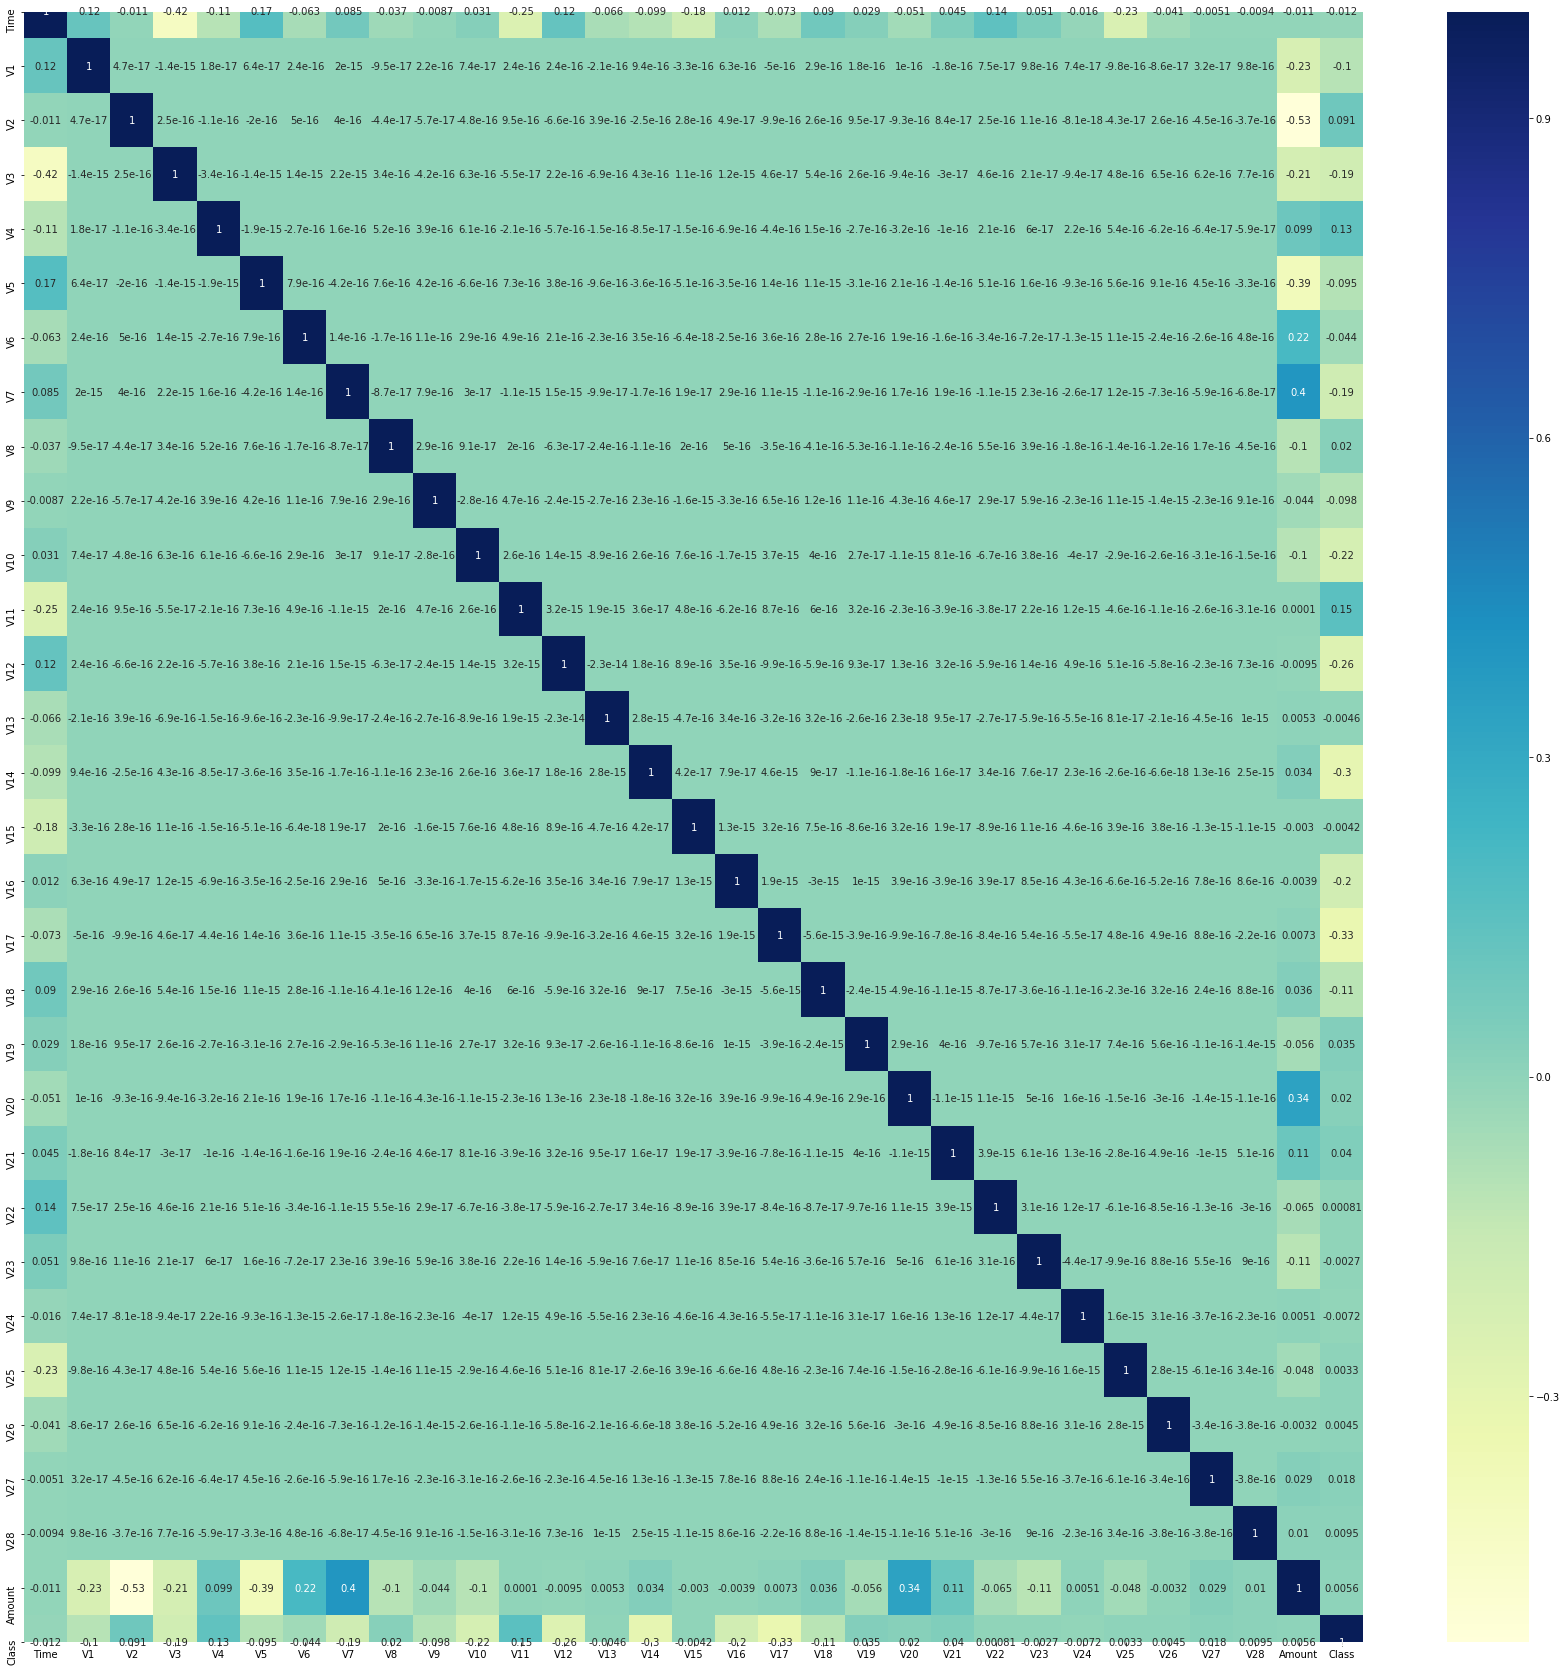

In [121]:
# Checking the correlations between all the variables. 

plt.figure(figsize=(30,30))
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.show()

From the above correlation heat map, we can see that there is absolutely no correlation between any variables, as the PCA is already applied. 

Lets now plot a density graph to see the density distribution of all the variables. From the plot we will be able to see the similarities in the distribution of all the variables which will help in dropping any similar features. 

Even though there will be certain variables that are similar to eachother, it is not advisable to drop the features, as they are all reduced dimensionally. Moreover, we will not know the significanse of all this PCA converted variables. 

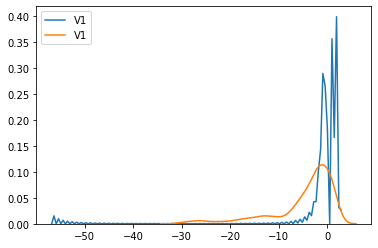

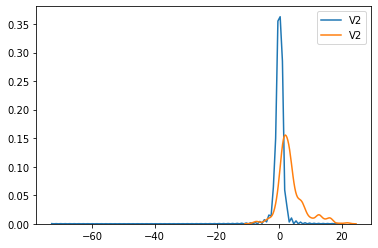

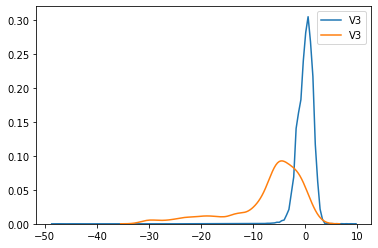

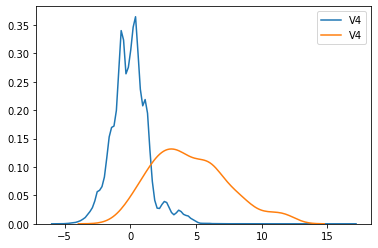

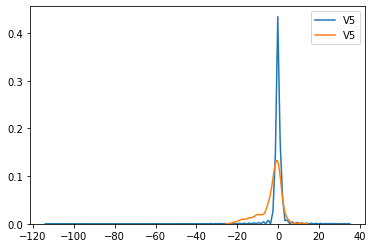

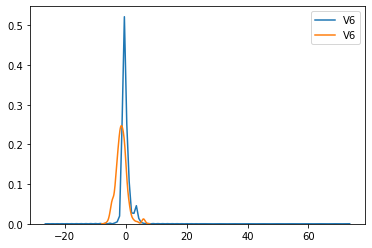

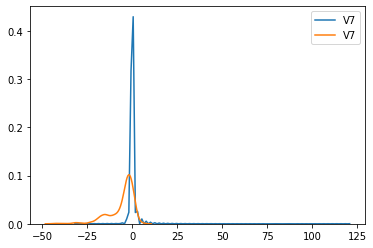

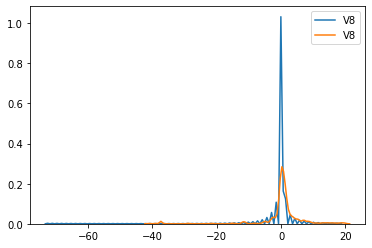

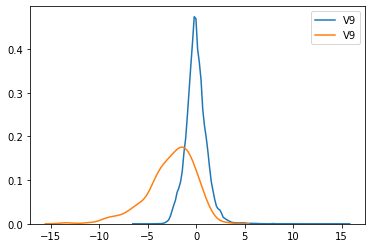

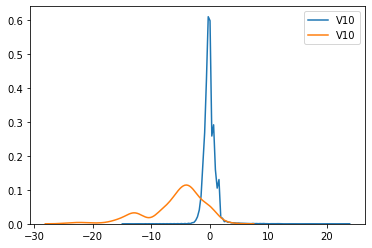

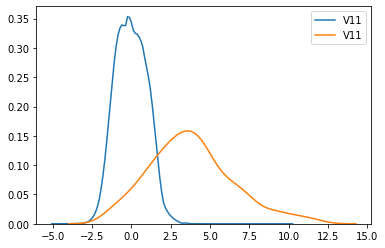

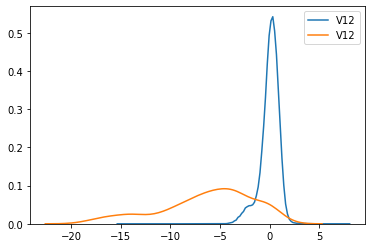

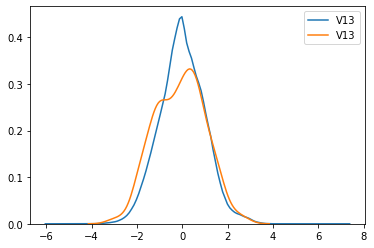

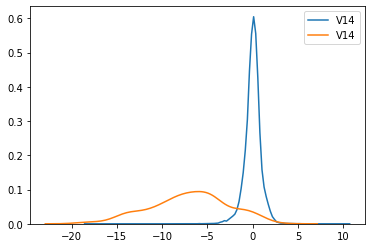

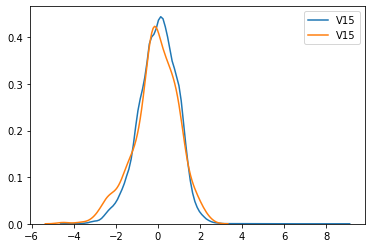

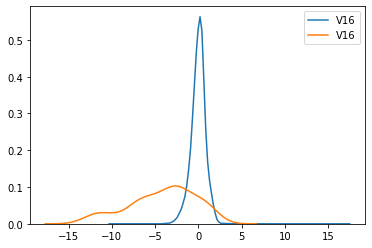

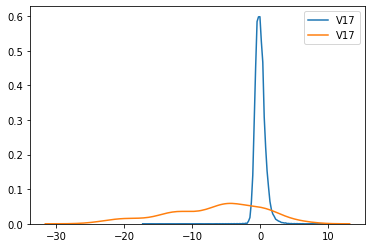

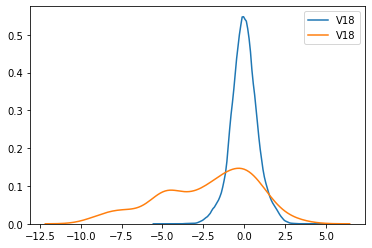

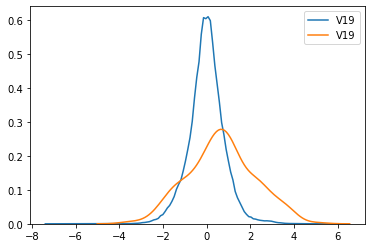

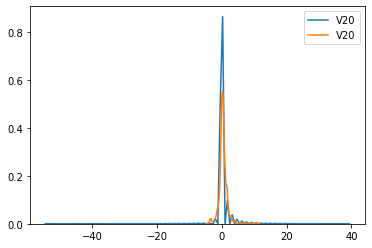

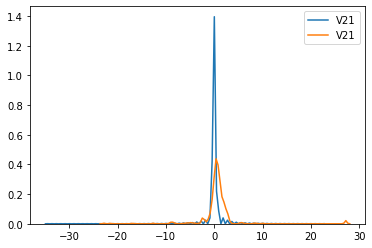

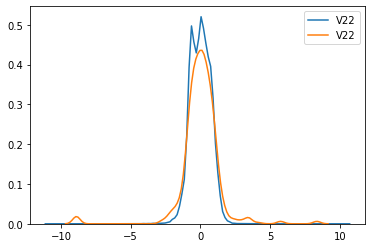

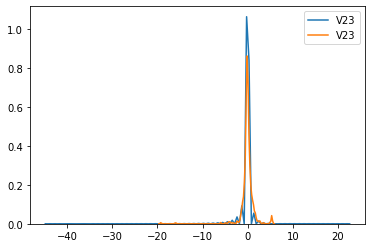

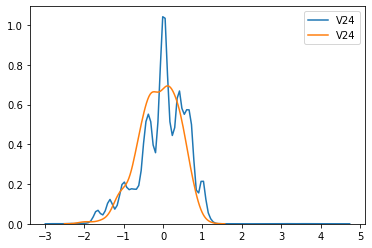

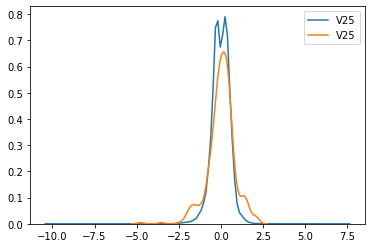

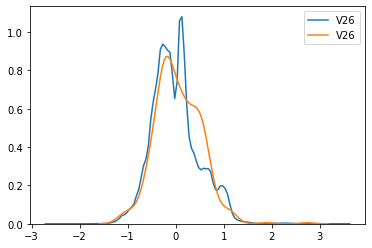

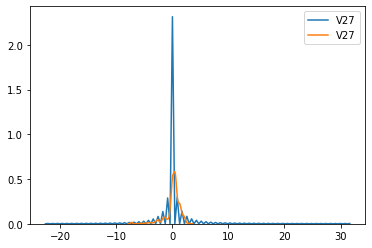

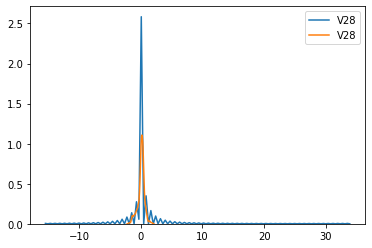

In [122]:
# Lets first plot Density plot graph and see the distribution of all the variables. 

for i in list(df):
    for j in range(2):
        if(i in ('Class','Time','Amount')):
            continue
        else:
            sns.kdeplot(df[df['Class']==j][i])
    plt.show()


When we see tha above density plot, that has been plotted for both Class 0 and Class 1, we can see that certain features like V2,V5,V6,V8,V13,V15,V20,V21,V22,V23,V24,V25,V26,V27,V28 has similar graph, which means that these features are not helping in explaining the target variable. 

But since these features are all masked by PCA, we dont know the real significanse of these features. Hence we will not drop any features from our data. 

### Splitting the data into train & test data

In [123]:
y = df.pop('Class')#class variable
X = df

In [124]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [125]:
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("X_test :",X_test.shape)
print("y_test :",y_test.shape)

X_train : (199364, 30)
y_train : (199364,)
X_test : (85443, 30)
y_test : (85443,)


In [126]:
X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,143180.0,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,...,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,1.29
163811,116231.0,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,...,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,2.69
196038,131332.0,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,...,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,4.55
25173,33527.0,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,...,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,19.95
253792,156421.0,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,...,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,6.30


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [127]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

In [128]:
# plot the histogram of a variable from the dataset to see the skewness

#Lets check the skewness of data in X_train

X_train.skew()

Time     -0.033807 
V1       -3.352780 
V2       -4.743314 
V3       -2.115044 
V4        0.671234 
V5       -0.335423 
V6        1.213213 
V7       -1.054441 
V8       -9.048266 
V9        0.524853 
V10       1.046184 
V11       0.337235 
V12      -2.187217 
V13       0.067930 
V14      -1.913552 
V15      -0.311223 
V16      -1.057503 
V17      -3.526079 
V18      -0.248354 
V19       0.116720 
V20      -1.377751 
V21       3.490872 
V22      -0.218690 
V23      -6.872356 
V24      -0.540695 
V25      -0.429101 
V26       0.567342 
V27      -2.175241 
V28       13.803155
Amount    13.520470
dtype: float64

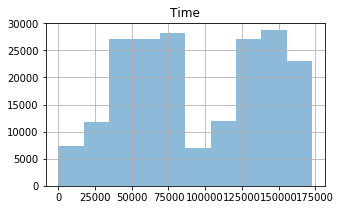

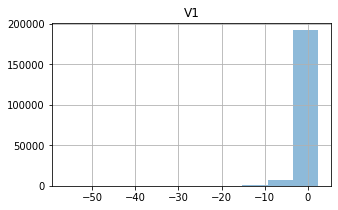

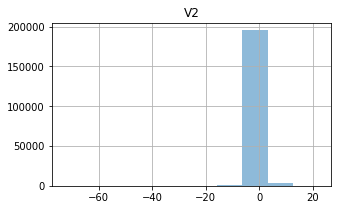

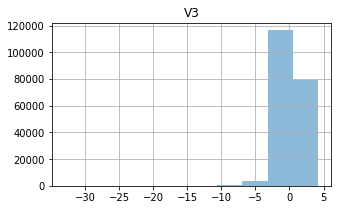

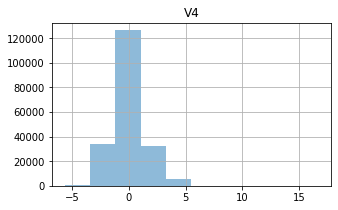

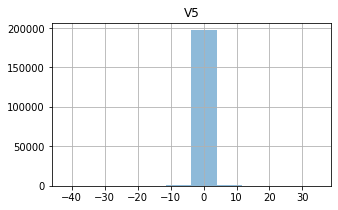

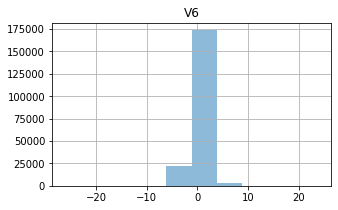

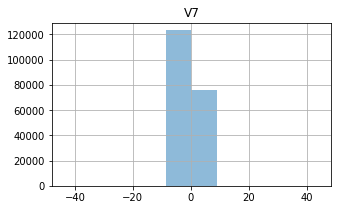

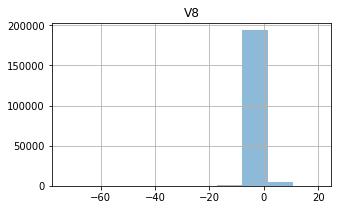

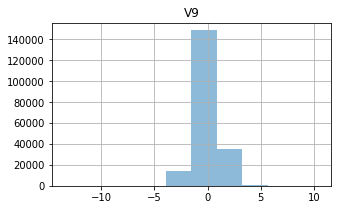

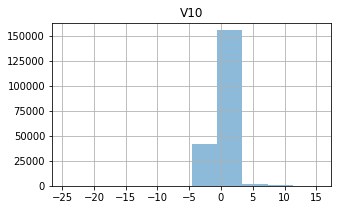

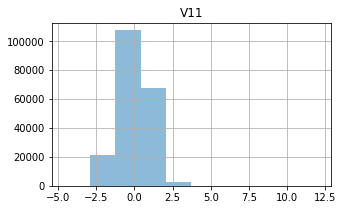

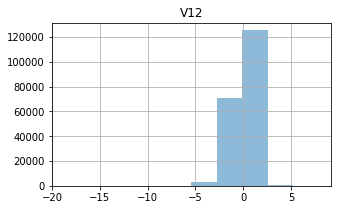

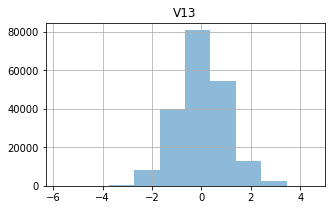

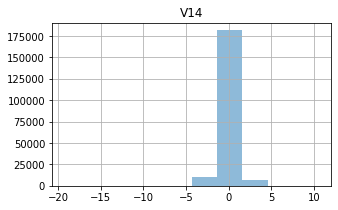

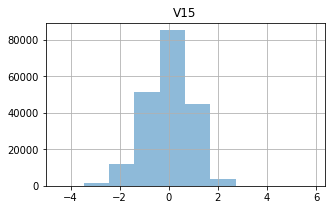

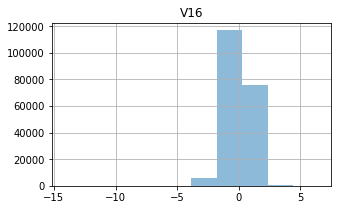

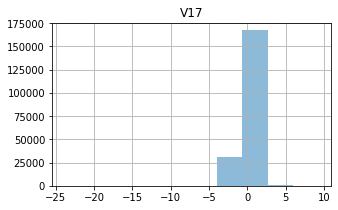

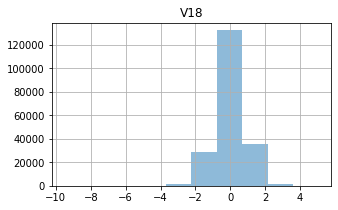

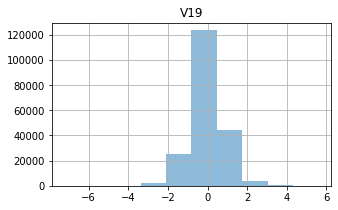

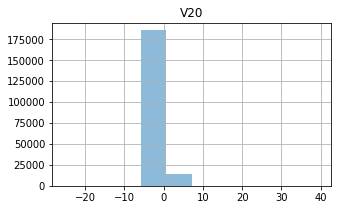

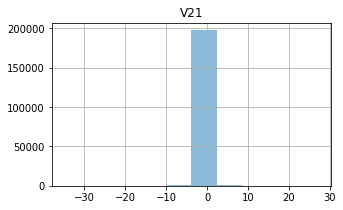

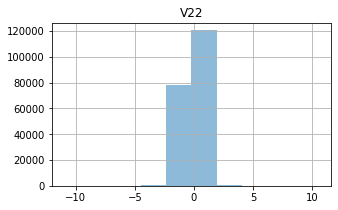

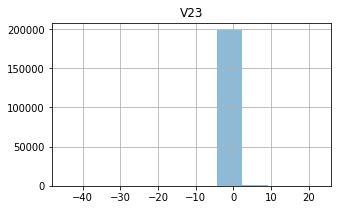

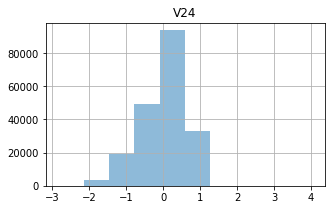

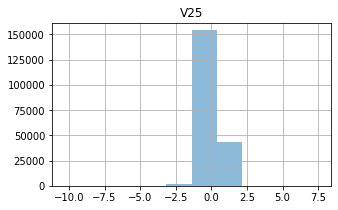

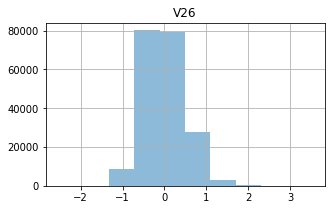

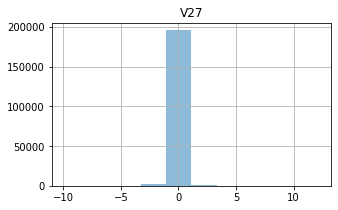

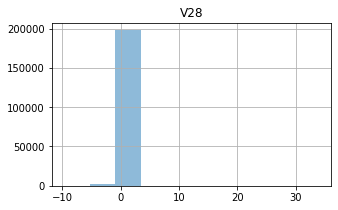

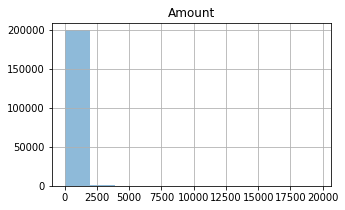

In [129]:
#Lets plot the histogram to visually see the skewness in the data. 
# plt.figure(figsize=(10,8))
# plt.subplot(15,2,1)
for i in X_train:
    X_train[i].hist(alpha=0.5, figsize=(5,3))
    plt.title(i)
    plt.show()

If we see the above histogram, it is clear that all the features in the X_train are highly skewed. None of their distributions are normally distributed. It will be case for the X_Test data points also. 

It is necessary to transform them to something similar to gaussian curve else the model that we predict will not be accurate.

There are several methods of trasnforming the data to take care of the skewness through log transformation, power transformation etc. Here we will proceed with power transformation to tackle the problem of skewness. 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [130]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train = pd.DataFrame(pt.fit_transform(X_train))
X_test = pd.DataFrame(pt.transform(X_test))

X_train.columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
X_test.columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

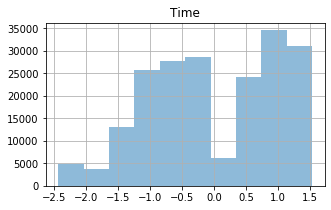

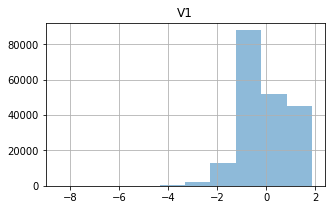

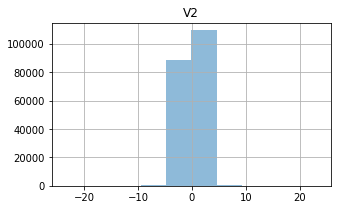

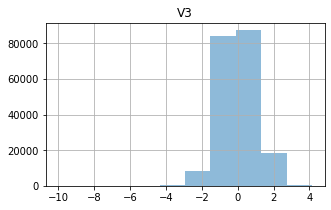

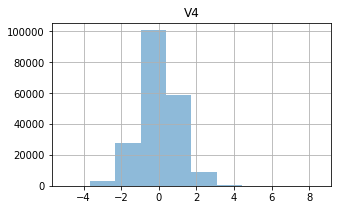

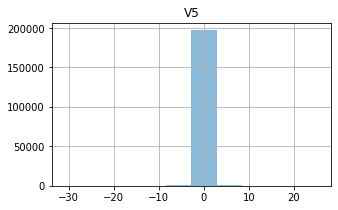

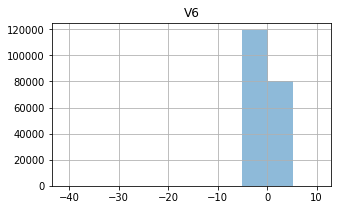

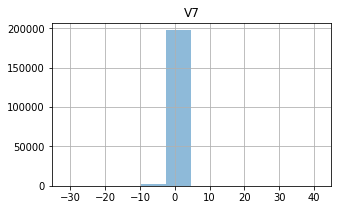

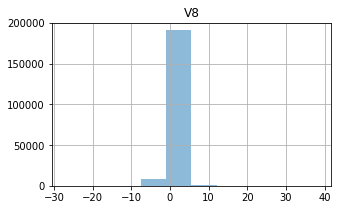

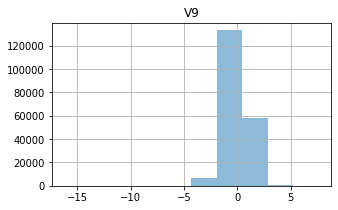

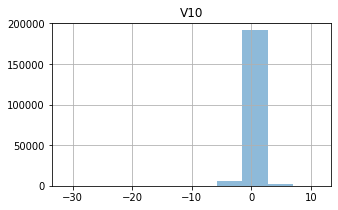

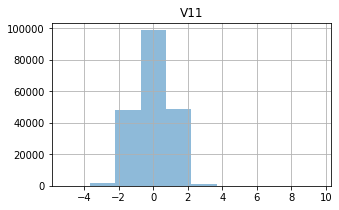

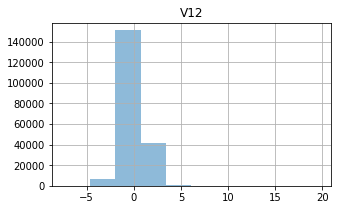

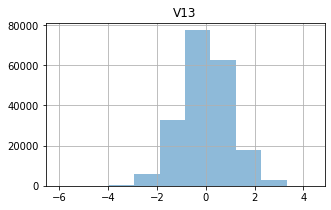

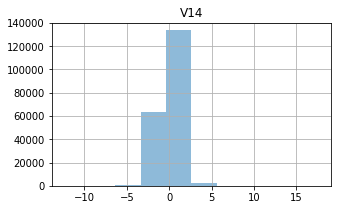

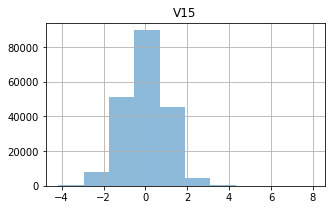

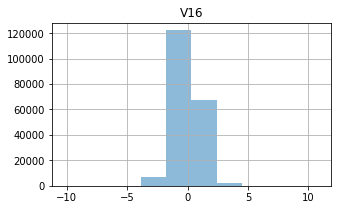

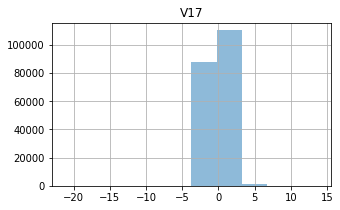

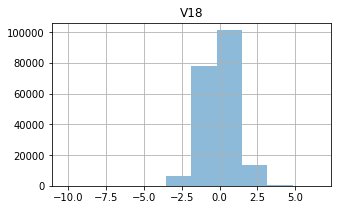

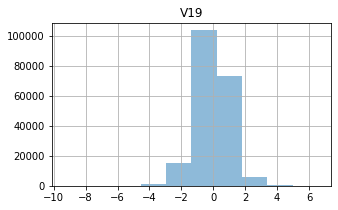

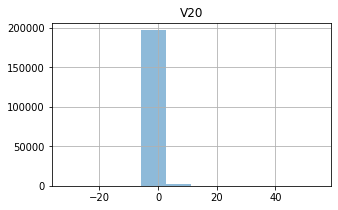

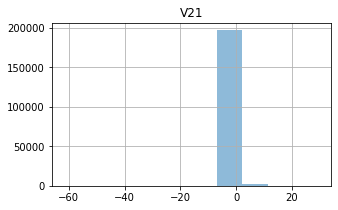

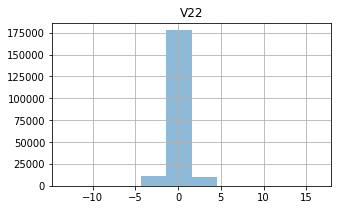

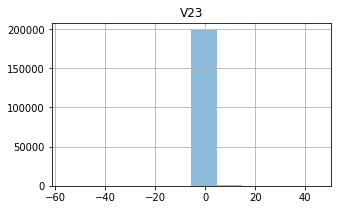

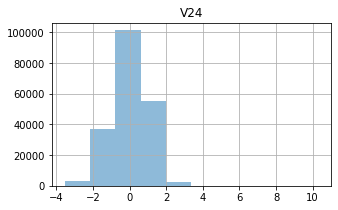

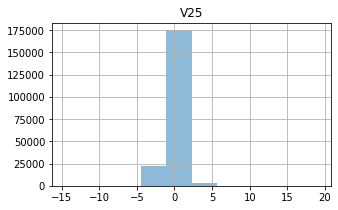

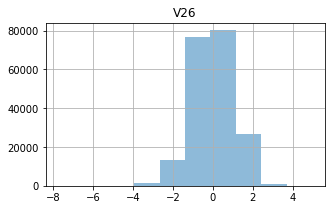

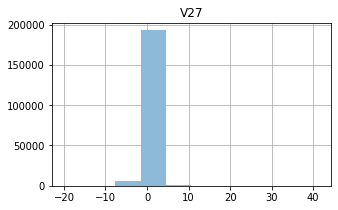

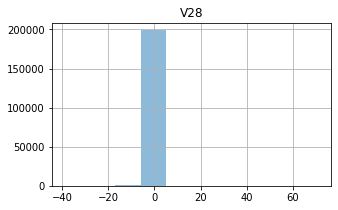

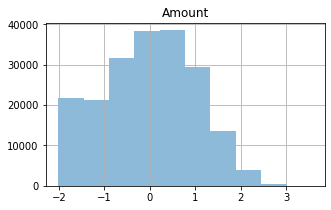

In [131]:
# plot the histogram of a variable from the dataset again to see the result 

for i in X_train:
    X_train[i].hist(alpha=0.5, figsize=(5,3))
    plt.title(i)
    plt.show()

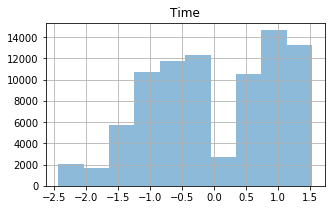

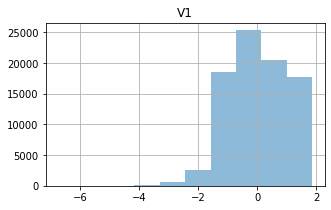

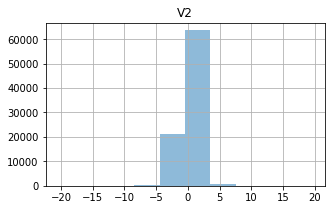

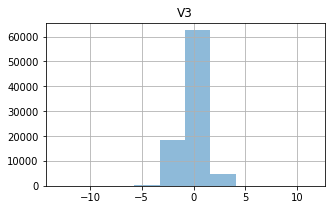

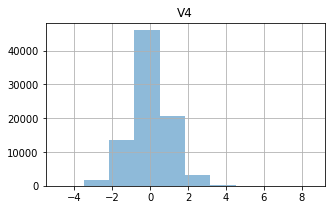

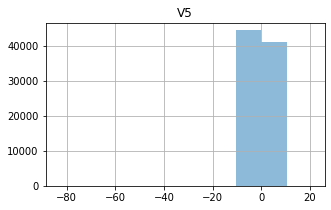

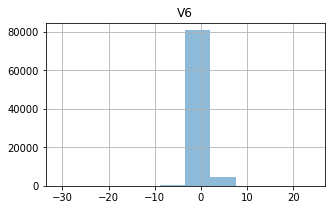

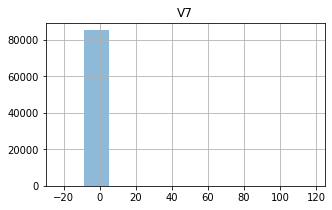

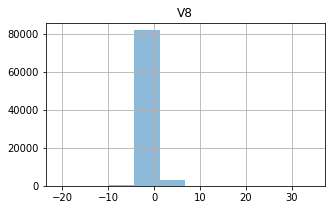

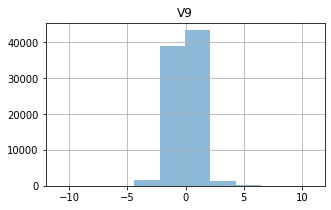

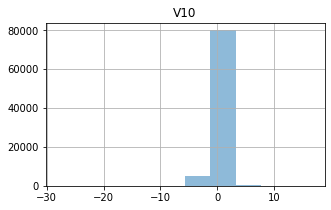

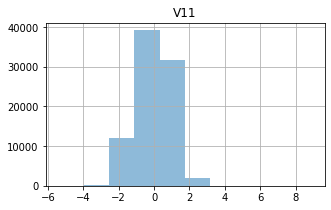

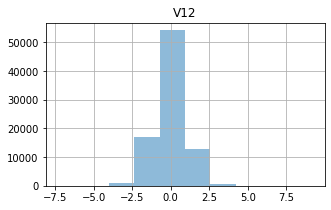

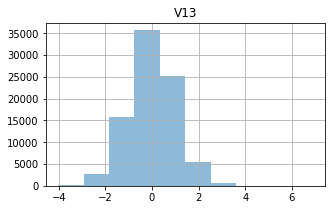

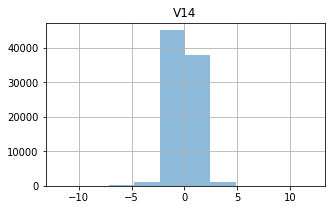

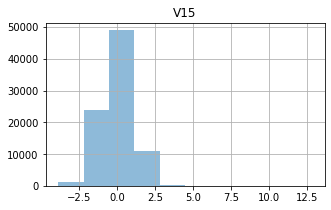

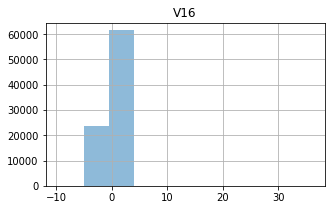

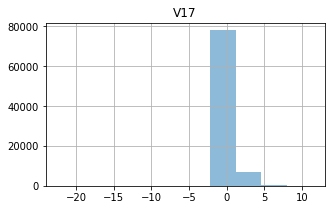

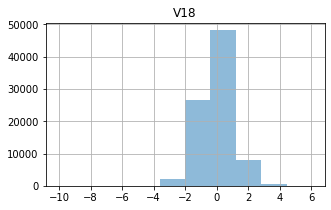

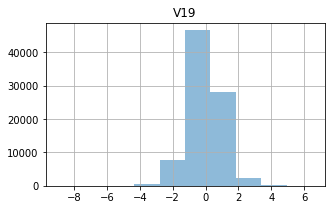

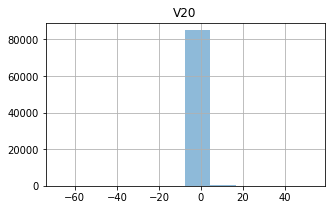

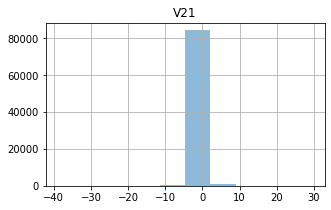

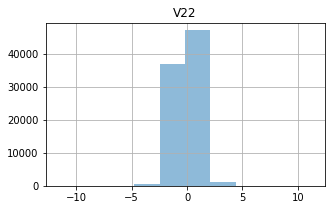

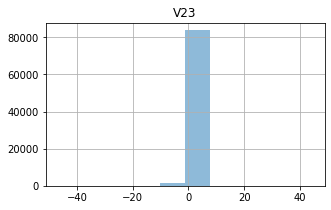

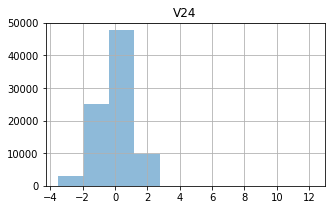

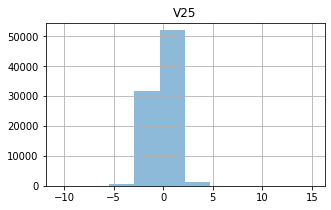

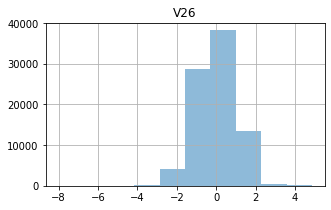

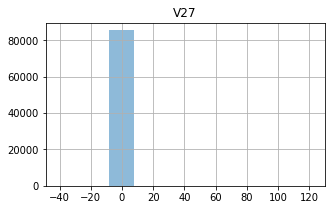

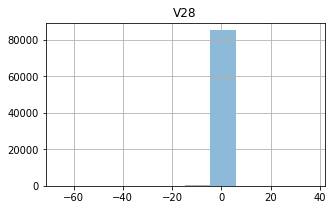

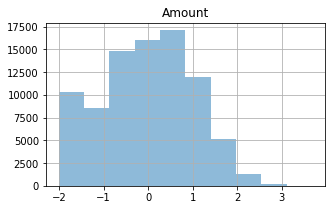

In [132]:
for i in X_test:
    X_test[i].hist(alpha=0.5, figsize=(5,3))
    plt.title(i)
    plt.show()

We can now see that the distribution has more less similar to the gaussian curve and there is not much of skewness in the data now that the power transformation is applied. 

## Scaling

Scaling is a data pre-processing step which helps in bringing all the numerical variables to the same scale. Before building any model, it is necessary to make sure that numerical features are all on the same scale. Failing to do so will give us inaccurate predictions. 

Lets use the Standard scalar to scale the numerical features in our dataset. 

In [133]:
# Normalizing 'Amount' and 'Time' Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['Amount','Time']] = sc.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']] = sc.transform(X_test[['Amount','Time']])

In [134]:
X_train.skew()

Time     -0.228681
V1       -0.218659
V2        0.348200
V3       -0.079351
V4        0.018358
V5       -0.346900
V6       -1.993752
V7        0.606021
V8        2.389016
V9       -0.060698
V10      -1.356770
V11       0.057088
V12       0.165318
V13       0.005926
V14       0.108003
V15       0.009912
V16       0.027145
V17      -0.825831
V18      -0.057166
V19       0.016302
V20      -0.481587
V21      -2.081382
V22      -0.019893
V23      -0.020900
V24       0.123275
V25       0.082718
V26      -0.023450
V27       1.326715
V28       1.207900
Amount    0.017888
dtype: float64

In [135]:
X_test.skew()

Time     -0.235939 
V1       -0.214299 
V2        0.329205 
V3       -0.093469 
V4        0.022231 
V5       -6.855255 
V6       -0.899514 
V7        16.483562
V8        3.427199 
V9        0.059177 
V10      -0.692382 
V11       0.094582 
V12       0.085191 
V13      -0.003224 
V14      -0.025467 
V15       0.029959 
V16       0.485241 
V17      -1.433237 
V18      -0.084352 
V19      -0.010217 
V20      -1.912118 
V21      -0.693835 
V22      -0.029154 
V23       3.076372 
V24       0.005615 
V25       0.081017 
V26      -0.014810 
V27       15.880052
V28      -5.377415 
Amount    0.030197 
dtype: float64

We can now see that the features that had skewness has been corrected after doing the power transformation and then scaling the features has given us a normal distribution of the data for the same variables. 

## Model Building with Imbalanced DataSet.
- Build different models on the imbalanced dataset and see the result

### Model 1: Simple Logistic Regression with Imbalanced Classes.

Lets first buils a basic logistic regression model without treating the data set for any imbalance classes. This is just done to check how the model is generated if we dont treat a highly imbalanced dataset like this.

In these scenarios, the model generated will predict that the accuracy of the model will be very high thereby predicting all the observations in the test dataset as class0 since it has very observation about the class1 data to learn about it. Therefore since it sees majority of the observations on Class0 it predicts the test observation also as Class0. Hence the need for solving class imbalance issue.

Lets now build the model and see it visually.

In [27]:
# Making the copy of the train and test datasets. 

X_train_model1 = X_train.copy()
y_train_model1 = y_train.copy()
X_test_model1 = X_test.copy()
y_test_model1 = y_test.copy()

In [28]:
#Importing packages.

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_model1,y_train_model1)

LogisticRegression()

In [29]:
# check the accuracy on the training set
print("Accuracy on the Training set:",model.score(X_train_model1, y_train_model1))

# check the accuracy on the test dataset
print("Accuracy on the Testing set:",model.score(X_test_model1, y_test_model1))

Accuracy on the Training set: 0.9993027828494613
Accuracy on the Testing set: 0.999133925541004


In [30]:
# Predict class labels for the train set
predicted_train = model.predict(X_train_model1)

# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_train_model1)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = model.predict(X_test_model1)

# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model1)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[198991    110]
 [    29    234]]
Confusion Matrix on Test data
[[85277    56]
 [   18    92]]


#### Training data Model evaluation.

In [31]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

In [32]:
print("***********************************From Training Data*******************************************************************")

print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)

Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_train_model1),4)
print("Training Accuracy of the model is:", Train_Accuracy)

## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)

## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)

# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)

Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)

Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)

print("***********************************End Training Data********************************************************************")

***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 234
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 198991
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 110
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 29
Training Accuracy of the model is: 0.9993
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.89
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0

#### ROC Curve

A ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [33]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

#### Test Data Model evaluation

In [34]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

In [35]:
print("***********************************From Test Data*******************************************************************")

print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model1),4)
print("Test Accuracy of the model is:", Test_Accuracy)

## Let's calculate Sensitivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)

## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)

# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)

Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)

Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)

print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 92
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85277
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 56
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 18
Test Accuracy of the model is: 0.9991
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.84
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.62
Recall 

#### ROC Curve

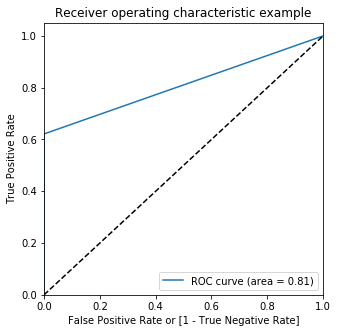

In [36]:
draw_roc(y_test_model1,predicted_test)

The Area under the curve value is 0.81, which means that the model has good class seperation capability.

In [37]:
pd.set_option('display.max_colwidth', 0)
results = pd.DataFrame({'Model':[1],'Desc':['Simple Logistic Regression with Imbalanced class'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
#results=results[['Model','Desc','Accuracy','Sensitivity','Specificity','FPR','TP','TN','FP','FN','AUC']]
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84


We can see from the above statistics that the model has predicted the accuracy as 99% since we have not handled the imbalance in the classes. Since we have majority of observations in the Class 0 (not-fraud class), the model is predicting the other classes as also in Class 0. Hence the high accuracy.

### Model2: Simple Logistic Regression with class_weight=Balanced Option(UNIFORM OVERSAMPLING).

In the second model, lets use logistic regression algorithm like the model1 but we will also use the **class_weight = Balanced** option in the mode building. 

**class_weight = Balanced** parameter uses **UNIFORM OVERSAMPLING** concept internally, which would handle the issue of class imbalance.

In [38]:
# Making the copy of the train and test datasets. 

X_train_model2 = X_train.copy()
y_train_model2 = y_train.copy()
X_test_model2 = X_test.copy()
y_test_model2 = y_test.copy()

In [39]:
# Instantiate a logistic regression model, and fit with X_train and y_train with the class_weight option.

model = LogisticRegression(class_weight = "balanced")
model.fit(X_train_model2, y_train_model2)

LogisticRegression(class_weight='balanced')

In [40]:
# check the accuracy on the training set
print("Accuracy on the Training set:",model.score(X_train_model2, y_train_model2))

# check the accuracy on the test dataset
print("Accuracy on the Testing set:",model.score(X_test_model2, y_test_model2))

Accuracy on the Training set: 0.9751710439196646
Accuracy on the Testing set: 0.9752583593740857


In [41]:
# Predict class labels for the train set
predicted_train = model.predict(X_train_model2)

# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_train_model2)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = model.predict(X_test_model2)

# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model2)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[194094     24]
 [  4926    320]]
Confusion Matrix on Test data
[[83198    17]
 [ 2097   131]]


#### Training data Model evaluation

In [42]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")

print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)

Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_train_model2),4)
print("Training Accuracy of the model is:", Train_Accuracy)

## Let's calculate Sensitivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)

## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)

# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)

Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)

Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)

print("***********************************End Training Data********************************************************************")

***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 320
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 194094
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 24
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 4926
Training Accuracy of the model is: 0.9752
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.06
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 

#### Test data Model Evaluation.

In [43]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model2),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 131
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 83198
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 17
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 2097
Test Accuracy of the model is: 0.9753
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.06
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.89
Reca

#### ROC Curve

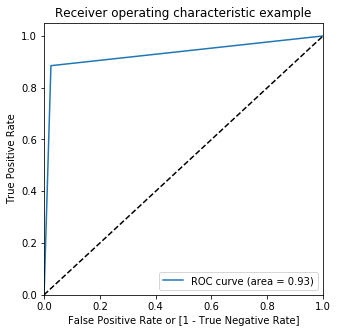

In [44]:
draw_roc(y_test_model2,predicted_test)

In [45]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[2],'Desc':[' Simple Logistic Regression with class_weight=balanced'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06


When we use the class_weight=balanced option in a simple logistic regression, we can see that the sensitivity of the model is 0.06 which is 6%. It means that the model is able to predict only 6% of the fraudulant transactions as fraud. It is misclassifying the remaining 94% of data as non-fraud which is wrong. 

Hence the model prediction is not reliable. We will now look at the other model to increase the sensitivity measure which tells about the classification of classes correctly. 

### Model 3: Logistic Regression with Hyper parameter tuning and 5 Fold cross validation. 

In this model, we will use the simple logistic regression model with hyper parameter tuning using Ridge and Lasso Regression. 

Ridge and Lasso Regression are simple techniques to reduce the model complexity and prevent over-fitting of the model. It regularizes the coefficient by reducing them in value, which is essentially causing the shrinkage in the coefficients. Ridge and Lasso perform different measures of shrinkage which depends on the value of the hyperparamter λ.

Regularization is the process used in machine learning to deliberately simplify models. Through regularization we try to strike the delicate balance between keeping the model simple yet not making it too naive to be of any use.
Bias quantifies how accurate is the model likely to be on future (test) data. We need to make sure that we have low bias and low variance for a model to be robust and generalizable. Complex models,assuming you have enough training data available, can do a very accurate job of prediction.Models that are too naive, are very likely to do badly. 

In this model, we are using GRIDSEARCH CV, where the model is evaluated for a range of hyperparamter values λ.

We are going to do logistic regression model with weights associated with classes for the following hyperparameter values:
1. norm used in the penalization will l1 and l2 (penalty)
2. Parameter C, which is the the inverse of regularization strength in Logistic Regression.A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator.It’s a penalty term, meant to disincentivize and regulate against Overfitting.

As part of this model, we will use the scikit learn pipeline feature for model building. It help us automate our machine learning workflows.Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modelling process that can be evaluated.The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

Parameters of pipelines can be set using ‘__’ separated parameter names.

We will use the default 5-fold cross validation.

In [46]:
# Making the copy of the train and test datasets. 

X_train_model3 = X_train.copy()
y_train_model3 = y_train.copy()
X_test_model3 = X_test.copy()
y_test_model3 = y_test.copy()

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
logistic = LogisticRegression(class_weight={0:0.00172, 1: 0.99828})
steps = [("logistic", logistic)]
pipe = Pipeline(steps)
params = {'logistic__C': [0.03,0.04,0.05,0.06,0.07,0.08,0.9,1,5,10], 
          'logistic__penalty': ['l1', 'l2']}
folds = 5
#folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
estimator = GridSearchCV(estimator=pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#### Fitting the model

In [48]:
estimator.fit(X_train_model3, y_train_model3)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight={0: 0.00172,
                                                                         1: 0.99828}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                                         0.9, 1, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

#### Cross Validation Summary

In [49]:
# cross validation results
pd.DataFrame(estimator.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.206802,0.018665,0.000000,0.000000,0.03,l1,"{'logistic__C': 0.03, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2.472320,0.232123,0.107270,0.032834,0.03,l2,"{'logistic__C': 0.03, 'logistic__penalty': 'l2'}",0.956334,0.982967,0.996163,0.974870,0.976423,0.977351,0.012916,1
2,0.233813,0.034945,0.000000,0.000000,0.04,l1,"{'logistic__C': 0.04, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3,2.831816,0.255841,0.084235,0.018626,0.04,l2,"{'logistic__C': 0.04, 'logistic__penalty': 'l2'}",0.956251,0.983115,0.995849,0.974623,0.976364,0.977240,0.012876,2
4,0.294776,0.035019,0.000000,0.000000,0.05,l1,"{'logistic__C': 0.05, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


#### Printing Best Hyperparameters

In [50]:
print("hyperparameters: ", estimator.best_params_)

hyperparameters:  {'logistic__C': 0.03, 'logistic__penalty': 'l2'}


#### Confusion matrix

In [51]:
# Predict class labels for the train set
predicted_train = estimator.predict(X_train_model3)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_train_model3)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = estimator.predict(X_test_model3)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model3)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[196671     33]
 [  2349    311]]
Confusion Matrix on Test data
[[84312    21]
 [  983   127]]


#### Train data Model evaluation

In [52]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_train_model3),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")

***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 311
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 196671
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 33
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 2349
Training Accuracy of the model is: 0.9881
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.12
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 

#### Test data Model evaluation

In [53]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model3),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 127
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 84312
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 21
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 983
Test Accuracy of the model is: 0.9882
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.11
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.86
Recal

#### ROC Curve

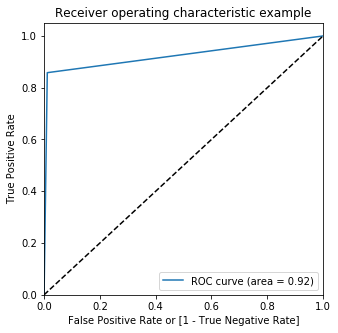

In [54]:
draw_roc(y_test_model3,predicted_test)

In [55]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[3],'Desc':['Logistic Regression with Hyperparameter Tuning and 5 fold cross validation'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11


If we see the abpve data of the 3rd model, we have a sensitivity of 11% which is slightly better than the 2nd model even then the model is not predicting good enough as it is able to predict only 11% of total fraudulant transactions correctly, which shows that the model is not predicting well. 

### Model 4: Random Forest with Hyper parameter tuning and 5 Fold cross validation. 

In this model, we will use the Random Forest algorithm with weights associated along with GridSearch Cross validation for building the model and predicting the test observations. Random Forests, is a collection of decision trees (ensemble) and they always outperform a decision tree in terms of accuracy. We will use Grid Search to find optimal hyperparameters in the random forest classifier. 

- **min_samples_leaf** : Total number of samples allowed to be present in a leaf node. 
- **max_features** : The number of features to consider when looking for the best split. We will try range of values between 5 and 30.
- **max_depth** : The maximum depth of the tree. We will try range of values between 5 and 10.

In this model, we will use the class_weight option as class_weight= {0:0.00172, 1: 0.99828}, which means that we are asking the model to use 0.00172 for the class0 observations and 0.99828 for the Class1 observations to minimize the loss. That is we penalize the model around 0.99828 times more when it misclassifies a positive minority example in this case.


In [56]:
# Importing the libraries. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [57]:
X_train_model4 = X_train.copy()
y_train_model4 = y_train.copy()
X_test_model4 = X_test.copy()
y_test_model4 = y_test.copy()

In [58]:
# creating the random classifier instance with the class_weight option to handle the class imbalance.

classifier_rf = RandomForestClassifier(class_weight= {0:0.00172, 1: 0.99828}, n_jobs = -1)

In [59]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4]
}

In [60]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [61]:
# Fitting the X_train and y_train to the grid search.

grid_search.fit(X_train_model4,y_train_model4)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 39.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.00172,
                                                            1: 0.99828},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [62]:
# printing the optimal accuracy score and hyperparameters

print('We can get sensitivity of',grid_search.best_score_,'using',grid_search.best_params_)

We can get sensitivity of 0.8605285592497868 using {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 100}


#### Confusion Matrix

In [63]:
# Predict class labels for the train set
predicted_train = grid_search.predict(X_train_model4)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_train_model4)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = grid_search.predict(X_test_model4)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model4)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[198534     34]
 [   486    310]]
Confusion Matrix on Test data
[[85073    21]
 [  222   127]]


#### Train Data Model Evaluation

In [64]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_train_model4),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")

***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 310
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 198534
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 34
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 486
Training Accuracy of the model is: 0.9974
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.39
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0

#### Test Data Model Evaluation

In [65]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model4),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 127
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85073
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 21
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 222
Test Accuracy of the model is: 0.9972
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.36
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.86
Recal

#### PLotting ROC Curve

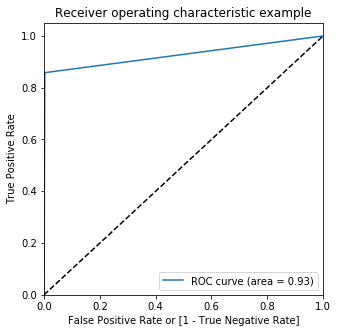

In [66]:
draw_roc(y_test_model4, predicted_test)

In [67]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[4],'Desc':['Random Forest with Hyperparameter Tuning and 5 fold cross validation'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36


In this model we see that the sensitivity measure has increased considerably that the previous models with 36% of datapoints in the test dataset correctly predicted as fraudulant data. Eventhough we have increased the sensitivity value, this value is not good enough to decide that this model does a good prediction. Hence we will proceed with other models to see their performance in prediction.

### Model 5: Logistic Regression  - Regularization, Hyper Parameter Tuning, GRIDSEARCH CV with SMOTE to handle class imbalance.

In thismodel, we will use the concept of **SMOTE (Synthetic Minority Over-Sampling Technique (SMOTE))** to handle the class imbalance in the train dataset. Using SMOTE, we can generate new data points, which lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. 

Once these samples are created we will use the basic logistic regression algorithm along with regularization, hyperparameter tuning and grid search cross validation with 5 folds to build the model and predict the test set. Here we will use the pipeline concept to handle the execution of algorithm and model building process. 

In [68]:
X_train_model5 = X_train.copy()
y_train_model5 = y_train.copy()
X_test_model5 = X_test.copy()
y_test_model5 = y_test.copy()

In [69]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_train_model5, y_train_model5)

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
logistic = LogisticRegression()
steps = [("logistic", logistic)]
pipe = Pipeline(steps)
params = {'logistic__C': [0.03,0.04,0.05,0.06,0.07,0.08,0.9,1,5,10], 
          'logistic__penalty': ['l1', 'l2']}
folds = 5
#folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
estimator = GridSearchCV(estimator=pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [71]:
estimator.fit(X_smote, y_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                                         0.9, 1, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [72]:
# cross validation results
pd.DataFrame(estimator.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.211187,0.028923,0.000000,0.000000,0.03,l1,"{'logistic__C': 0.03, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,9.513395,0.866066,0.215902,0.051900,0.03,l2,"{'logistic__C': 0.03, 'logistic__penalty': 'l2'}",0.990948,0.990778,0.990889,0.990563,0.990841,0.990804,0.000133,10
2,0.469348,0.086043,0.000000,0.000000,0.04,l1,"{'logistic__C': 0.04, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,9.469370,0.846802,0.186695,0.036622,0.04,l2,"{'logistic__C': 0.04, 'logistic__penalty': 'l2'}",0.990957,0.990787,0.990898,0.990572,0.990851,0.990813,0.000133,9
4,0.476483,0.060946,0.000000,0.000000,0.05,l1,"{'logistic__C': 0.05, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [73]:
print("hyperparameters: ", estimator.best_params_)

hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [74]:
# Predict class labels for the train set
predicted_train = estimator.predict(X_smote)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_smote)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = estimator.predict(X_test_model5)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model5)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[193674  14120]
 [  5346 184900]]
Confusion Matrix on Test data
[[83082    16]
 [ 2213   132]]


In [75]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_smote),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")

***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 184900
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 193674
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 14120
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 5346
Training Accuracy of the model is: 0.9511
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.97
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  0.93
False postive rate - predicting fradulent when transactions is not fradulent: 0.07
Precision - What proportion of positive identifications (fraudulent transactions) was actually co

In [76]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model5),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 132
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 83082
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 16
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 2213
Test Accuracy of the model is: 0.9739
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.06
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.89
Reca

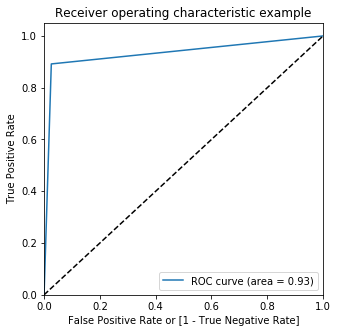

In [77]:
draw_roc(y_test_model5,predicted_test)

In [78]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[5],'Desc':['Logistic Regression - Regularization, Hyperparameter Tuning & GRIDSEARCH CV with SMOTE to handle class imbalance and 5 fold cross validation'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06


Our model has a Precision of 0.89—in other words, when it predicts a fradulent transaction, it is correct 89% of the time. However, Recall is 0.06—in other words, it correctly identifies 6% of all fradulent transactions. Recall is not improved from Model 3, instead it is further reduced by 5%. We have to use different algorithm such as KNN or XGBOOST to improve the Recall score.

### Model 6: K-Nearest Neighbour with SMOTE to handle class imbalance. 

KNN: K-nearest neighbour is a simple, supervised machine learning algorithm used for both classification and regression tasks. It performs these tasks by identifying the neighbours that are nearest to a data point. For classification tasks, it takes the majority vote and for regression tasks, it takes the average value from the neighbours.  

The k in KNN specifies the number of neighbours that the algorithm should focus on. For example, if k = 3, then, for a particular test data, the algorithm observes the three nearest neighbours and takes the majority vote from them. Depending on the majority of the classes from the three nearby points, the algorithm classifies the test data.

Given the uneven nature of the dataset, it is necessary to oversample the minor class (1 = fradulent) in order to ensure that the KNN results are not skewed towards the major class.

In [79]:
X_train_model6 = X_train.copy()
y_train_model6 = y_train.copy()
X_test_model6 = X_test.copy()
y_test_model6 = y_test.copy()

In [80]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_train_model6, y_train_model6)

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Finding the best value for k

K to be processed is 1
K to be processed is 2
K to be processed is 3
K to be processed is 4
K to be processed is 5


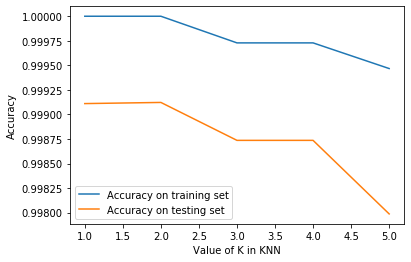

In [81]:
k_range = range(1, 6)
score1=[]
score2=[]
for k in k_range:
    print("K to be processed is",k)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_smote,y_smote)
    score1.append(knn.score(X_smote,y_smote))
    score2.append(knn.score(X_test_model6,y_test_model6))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [82]:
knn=KNeighborsClassifier(n_neighbors=2)
knn_ad_m=knn.fit(X_smote,y_smote)

In [83]:
# Predict class labels for the train set
predicted_train = knn_ad_m.predict(X_smote)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_smote)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = knn_ad_m.predict(X_test_model6)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model6)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[199020      0]
 [     0 199020]]
Confusion Matrix on Test data
[[85243    23]
 [   52   125]]


#### Train Data Model Evaluation

In [84]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_smote),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")


***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 199020
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 199020
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 0
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 0
Training Accuracy of the model is: 1.0
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  1.0
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 1.0
R

#### Test Data Model Evaluation

In [85]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model6),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 125
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85243
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 23
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 52
Test Accuracy of the model is: 0.9991
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.71
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.84
Recall

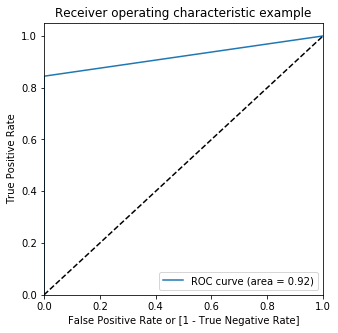

In [86]:
draw_roc(y_test_model6,predicted_test)

In [87]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[6],'Desc':['K-Nearest Neighbors and SMOTE'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71


Here we have a good recall metric value of 71% which means that the model is able to predict the fraudulant transactions in the test dataset correctly about 71% which gives us a huge difference compared to the previous models. 

Lets go ahead and use other class imbalance methods to see whether we are able to achieve higher model prediction capability. 

### Model 7: K-Nearest Neighbour and ADASYN to handle Class Imbalance. 

We will now use **ADAptive SYNthetic (ADASYN)** to handle class imbalance. This is similar to SMOTE, with a minor change in the generation of synthetic sample points for minority data points. 

For a particular data point, the number of synthetic samples that it will add will have a density distribution, whereas, for SMOTE, the distribution will be uniform. The aim here is to create synthetic data for minority examples that are harder to learn, rather than the easier ones. 

We will use the ADASYN concept along with the KNN algorithm and will build the model. 

In [88]:
X_train_model7 = X_train.copy()
y_train_model7 = y_train.copy()
X_test_model7 = X_test.copy()
y_test_model7 = y_test.copy()

In [89]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN()
x_ad, y_ad = ad.fit_sample(X_train_model7, y_train_model7)
 
x_ad = pd.DataFrame(data = x_ad, columns = X_train_model7.columns)

print(X_train_model7.shape)
print(x_ad.shape)
print(np.unique(y_ad, return_counts=True))

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(199364, 30)
(398003, 30)
(array([0, 1], dtype=int64), array([199020, 198983], dtype=int64))


In [90]:
# Initialising K Neighbors Classifier
knn_ad=KNeighborsClassifier(n_neighbors=2)
knn_ad_m=knn_ad.fit(x_ad,y_ad) # K Neighbors Classifier

In [91]:
# Predict class labels for the train set
predicted_train = knn_ad_m.predict(x_ad)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_ad)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = knn_ad_m.predict(X_test_model7)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model7)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[199020      0]
 [     0 198983]]
Confusion Matrix on Test data
[[85244    23]
 [   51   125]]


#### Train Data Model Evaluation

In [92]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_ad),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")


***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 198983
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 199020
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 0
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 0
Training Accuracy of the model is: 1.0
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  1.0
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 1.0
R

#### Test Data Model Evaluation

In [93]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model7),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 125
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85244
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 23
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 51
Test Accuracy of the model is: 0.9991
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.71
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.84
Recall

#### ROC Curve

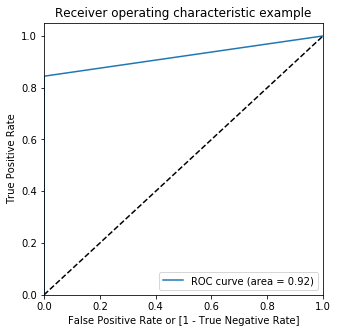

In [94]:
draw_roc(y_test_model7,predicted_test)

In [95]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[7],'Desc':['K-Nearest Neighbour and ADASYN'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71
0,7,ADASYN & K-Nearest Neighbors with k=2,0.9991,0.71,1.0,0.0,125,85244,23,51,0.921998,0.84,0.71


The result of this model is more or less similar to the last model which is KNN with SMOTE method for imbalance handling. Lets build further to see any difference is achieved in the model predictability. 

### Model 8: XGBOOST with Regularizaton & ADASYN to handle class imbalance.

XGBoost is an extended version of gradient boosting where it uses more accurate approximations to tune the model and find the best fit. We will just randomly pick L1 regularization term and L2 regularization term on weights.

Along with the XGBOOST algorithm we will use the ADASYN method for imbalance handling. 

In [136]:
X_train_model8 = X_train.copy()
y_train_model8 = y_train.copy()
X_test_model8 = X_test.copy()
y_test_model8 = y_test.copy()

In [137]:
print(X_train_model8.shape)
print(X_test_model8.shape)

(199364, 30)
(85443, 30)


In [143]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN()
x_ad, y_ad = ad.fit_sample(X_train_model8, y_train_model8)
x_ad = pd.DataFrame(data = x_ad, columns = X_train_model8.columns)

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [144]:
# Initialising XG boost 
xg_ad = XGBClassifier(learning_rate=0.5,reg_alpha= 0.00001, reg_lambda= 0.00001)

In [145]:
# training the models
xg_ad_m = xg_ad.fit(x_ad, y_ad) # XG boost

In [146]:
X_train_model8.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.000407,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,...,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
1,0.490732,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,...,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
2,0.779333,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,...,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
3,-1.313086,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,...,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
4,1.242536,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,...,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


In [148]:
# Predict class labels for the train set
predicted_train = xg_ad_m.predict(x_ad)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_ad)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = xg_ad_m.predict(X_test_model8)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model8)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[199020      0]
 [     0 198983]]
Confusion Matrix on Test data
[[85256    27]
 [   39   121]]


#### Train data Model Evaluation

In [149]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_ad),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")


***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 198983
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 199020
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 0
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 0
Training Accuracy of the model is: 1.0
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  1.0
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 1.0
R

#### Test Data - Model Evaluation.

In [150]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model8),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")


***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 121
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85256
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 27
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 39
Test Accuracy of the model is: 0.9992
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.76
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.82
Recall

#### ROC Curve

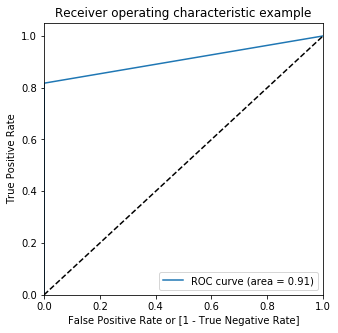

In [151]:
draw_roc(y_test_model8,predicted_test)

In [152]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[8],'Desc':['XGBoost with Regularization & ADASYN'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71
0,7,ADASYN & K-Nearest Neighbors with k=2,0.9991,0.71,1.0,0.0,125,85244,23,51,0.921998,0.84,0.71
0,8,ADASYN & XGBoost Algorithm,0.9992,0.76,1.0,0.0,121,85256,27,39,0.908555,0.82,0.76


This model gives us a really good recall measure of 76% which is better than all the previous models we have built. Lets further tune certain hyper parameters and see whether we are able to achieve more recall value. 

### Model 9: XGBOOST with GRIDSEARCHCV & Hyperparameter Tuning with ADASYN to handle class imbalance.

We will tune the XGBoost algorithm using the below hyperparameters using different values and derive the best value

1. The learning_rate parameter controls the magnitude of change that is permitted from one tree to the next.
2. The max_depth parameter determines how deep each estimator is permitted to build a tree. Typically, increasing tree depth can lead to overfitting if other mitigating steps aren’t taken to prevent it. 
3. We will use n_estimators_ parameter as 100 which specifies how many sequential trees we want to make that attempt to correct for prior trees. 

In [153]:
X_train_model9 = X_train.copy()
y_train_model9 = y_train.copy()
X_test_model9 = X_test.copy()
y_test_model9 = y_test.copy()

In [155]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN()
x_ad, y_ad = ad.fit_sample(X_train_model9, y_train_model9)
x_ad = pd.DataFrame(data = x_ad, columns = X_train_model9.columns)

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [156]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
logistic = XGBClassifier(n_estimators=100)
steps = [("logistic", logistic)]
pipe = Pipeline(steps)
params = {'logistic__learning_rate': np.arange(0.5, 0.85, 0.05),
    'logistic__max_depth': np.arange(3, 8, 1)}
folds = 3
#folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
estimator = GridSearchCV(estimator=pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [157]:
estimator.fit(x_ad, y_ad)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 65.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('logistic',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                     

In [158]:
print("hyperparameters: ", estimator.best_params_)

hyperparameters:  {'logistic__learning_rate': 0.6500000000000001, 'logistic__max_depth': 4}


In [159]:
# Initialising XG boost 
xg_ad = XGBClassifier(n_estimators=100,learning_rate=0.6500000000000001,max_depth= 4)

In [160]:
# training the models
xg_ad_m = xg_ad.fit(x_ad, y_ad) # XG boost

In [161]:
# Predict class labels for the train set
predicted_train = xg_ad.predict(x_ad)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_ad)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = xg_ad.predict(X_test_model9)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model9)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[199019      0]
 [     1 198983]]
Confusion Matrix on Test data
[[85242    29]
 [   53   119]]


#### Train Data Model Evaluation

In [162]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_ad),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")


***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 198983
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 199019
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 0
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 1
Training Accuracy of the model is: 1.0
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  1.0
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 1.0
R

#### Test Data Model Evaluation.

In [163]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model9),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 119
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 85242
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 29
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 53
Test Accuracy of the model is: 0.999
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.69
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.8
Recall -

#### ROC Curve

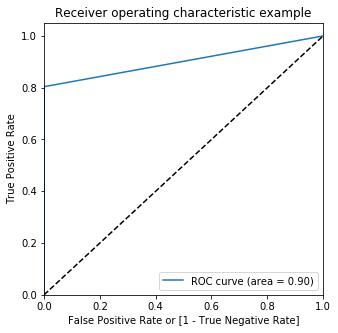

In [164]:
draw_roc(y_test_model9,predicted_test)

In [165]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[9],'Desc':['XGBOOST with GRIDSEARCH CV & Hyperparameter Tuning with ADASYN'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71
0,7,ADASYN & K-Nearest Neighbors with k=2,0.9991,0.71,1.0,0.0,125,85244,23,51,0.921998,0.84,0.71
0,8,ADASYN & XGBoost Algorithm,0.9992,0.76,1.0,0.0,121,85256,27,39,0.908555,0.82,0.76
0,9,XGBOOST with GRIDSEARCH CV & Hyperparameter Tuning with ADASYN,0.9990,0.69,1.0,0.0,119,85242,29,53,0.901716,0.80,0.69


When we use the XGBOOST algorithm with tuning the hyperparamters such as maximum depth allowed for the trees we build, total number of trees and the learning rate of the model, our recall measure is reducing to 69% from 76%. 

Lets now use a different algorithm to see whether our recall measure is increasing. 

### Model 10: Random Forest Classifier with Hyperparameters & GRIDSEARCH CV and ADASYN to handle class Imbalance.

We will now use Random Forest Classifier with weights associated with classes and 5 fold cross validation to predict the churn. Random Forests, is a collection of decision trees (ensemble) and they always outperform a decision tree in terms of accuracy. We will use Grid Search to find optimal hyperparameters in the random forest classifier. 


- **n_estimators**:  The number of trees in the forest to be default.
- **criterion**: we will leave it default i.e. ”gini”. The function to measure the quality of a split.
- **max_features** : The number of features to consider when looking for the best split. We will try range of values between 5 and 30.
- **max_depth** : The maximum depth of the tree. We will try range of values between 5 and 10.

In [166]:
X_train_model10 = X_train.copy()
y_train_model10 = y_train.copy()
X_test_model10 = X_test.copy()
y_test_model10 = y_test.copy()

In [169]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN()
x_ad, y_ad = ad.fit_sample(X_train_model10, y_train_model10)
x_ad = pd.DataFrame(data = x_ad, columns = X_train_model10.columns)

C:\Users\preet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [170]:
# Initialising Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_ad = RandomForestClassifier()
param_grid = {'max_depth': range(5,12,1), 'max_features':range(10,15,1)}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_ad, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs = -1,verbose = 1)

In [171]:
# Fit the grid search to the data
grid_search.fit(x_ad, y_ad)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 134.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 12),
                         'max_features': range(10, 15)},
             scoring='roc_auc', verbose=1)

In [172]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9903157217461693 using {'max_depth': 11, 'max_features': 11}


Fitting the model with the best parameters received from the Grid Search 

In [173]:
# Initialising Random Forest model
rf_ad = RandomForestClassifier(max_depth=11, max_features=11)

In [174]:
# training the models
rf_ad_m = rf_ad.fit(x_ad,y_ad) # Random Forest

In [175]:
# Predict class labels for the train set
predicted_train = rf_ad_m.predict(x_ad)
# Confusion Matrix for train data
print('Confusion Matrix on Train data')
train_confusion_matrix=confusion_matrix(predicted_train, y_ad)
print(train_confusion_matrix)

# Predict class labels for the test dataset
predicted_test = grid_search.predict(X_test_model10)
# Confusion Matrix for test data
print('Confusion Matrix on Test data')
test_confusion_matrix=confusion_matrix(predicted_test, y_test_model10)
print(test_confusion_matrix)

Confusion Matrix on Train data
[[197226    195]
 [  1794 198788]]
Confusion Matrix on Test data
[[84462    23]
 [  833   125]]


#### Train Data Model Evaluation

In [176]:
Train_TP = train_confusion_matrix[1,1] # true positive
Train_TN = train_confusion_matrix[0,0] # true negatives
Train_FP = train_confusion_matrix[0,1] # false positives
Train_FN = train_confusion_matrix[1,0] # false negatives

print("***********************************From Training Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Train_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Train_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Train_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Train_FN)
Train_Accuracy=round(metrics.accuracy_score(predicted_train, y_ad),4)
print("Training Accuracy of the model is:", Train_Accuracy)
## Let's calculate Sensistivity. 
Train_Sensitivity=round(Train_TP / float(Train_TP+Train_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Train_Sensitivity)
## Specificity
Train_Specificity=round(Train_TN / float(Train_TN+Train_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Train_Specificity)
# Calculate false postive rate
Train_FPR=round(Train_FP/ float(Train_TN+Train_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Train_FPR)
Train_Precision=round(Train_TP/ float(Train_TP+Train_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Train_Precision)
Train_Recall=round(Train_TP/ float(Train_TP+Train_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Train_Recall)
print("***********************************End Training Data********************************************************************")


***********************************From Training Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 198788
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 197226
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 195
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 1794
Training Accuracy of the model is: 0.995
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.99
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct

#### Test Data Model Evaluation

In [177]:
Test_TP = test_confusion_matrix[1,1] # true positive
Test_TN = test_confusion_matrix[0,0] # true negatives
Test_FP = test_confusion_matrix[0,1] # false positives
Test_FN = test_confusion_matrix[1,0] # false negatives

print("***********************************From Test Data*******************************************************************")
print("True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud:",Test_TP)
print("True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud:",Test_TN)
print("False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error:",Test_FP)
print("False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error:",Test_FN)
Test_Accuracy=round(metrics.accuracy_score(predicted_test, y_test_model10),4)
print("Test Accuracy of the model is:", Test_Accuracy)
## Let's calculate Sensistivity. 
Test_Sensitivity=round(Test_TP / float(Test_TP+Test_FN),2)
print("Sensistivity - When it’s actually fradulent, how often does it predict fradulent: ",Test_Sensitivity)
## Specificity
Test_Specificity=round(Test_TN / float(Test_TN+Test_FP),2)
print("Specificity - When it’s actually not fradulent, how often does it predict not fradulent??: ", Test_Specificity)
# Calculate false postive rate
Test_FPR=round(Test_FP/ float(Test_TN+Test_FP),2)
print("False postive rate - predicting fradulent when transactions is not fradulent:",Test_FPR)
Test_Precision=round(Test_TP/ float(Test_TP+Test_FP),2)
print("Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?:",Test_Precision)
Test_Recall=round(Test_TP/ float(Test_TP+Test_FN),2)
print("Recall - What proportion of actual positives (fradulent transactions) was identified correctly??:",Test_Recall)
print("***********************************End Test Data********************************************************************")

***********************************From Test Data*******************************************************************
True Positives (TP) - These are transactions in which we predicted fraud and transactions is actually fraud: 125
True Negatives (TN) - We predicted no (transactions aren't fraud) and they aren't fraud: 84462
False Positives (FP) - We predicted transactions are fraud, but they aren't fraudulent; Also known as a Type I error: 23
False Negatives (FN) - We predicted transactions aren't fraudulent, but they actually is fradulent; Also known as a Type II error: 833
Test Accuracy of the model is: 0.99
Sensistivity - When it’s actually fradulent, how often does it predict fradulent:  0.13
Specificity - When it’s actually not fradulent, how often does it predict not fradulent??:  1.0
False postive rate - predicting fradulent when transactions is not fradulent: 0.0
Precision - What proportion of positive identifications (fraudulent transactions) was actually correct?: 0.84
Recall 

#### ROC Curve

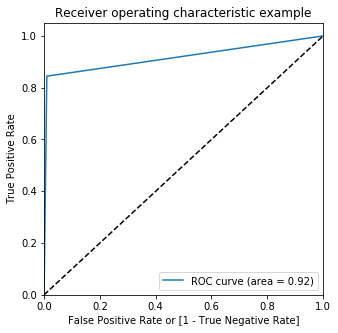

In [178]:
draw_roc(y_test_model10,predicted_test)

In [179]:
pd.set_option('display.max_colwidth', 0)
tempResults = pd.DataFrame({'Model':[10],'Desc':['Random Forest Classifier with Grid Search & Hyperparameters'],'Accuracy':[Test_Accuracy],'Sensitivity':[Test_Sensitivity],'Specificity':[Test_Specificity],'FPR':[Test_FPR],'TP':[Test_TP],'TN':[Test_TN],'FP':[Test_FP],'FN':[Test_FN],'ÁUC':[metrics.roc_auc_score( y_test,predicted_test)],'Precision':[Test_Precision],'Recall':[Test_Recall],})
results = pd.concat([results, tempResults])
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71
0,7,ADASYN & K-Nearest Neighbors with k=2,0.9991,0.71,1.0,0.0,125,85244,23,51,0.921998,0.84,0.71
0,8,ADASYN & XGBoost Algorithm,0.9992,0.76,1.0,0.0,121,85256,27,39,0.908555,0.82,0.76
0,9,XGBOOST with GRIDSEARCH CV & Hyperparameter Tuning with ADASYN,0.9990,0.69,1.0,0.0,119,85242,29,53,0.901716,0.80,0.69
0,10,Random Forest Classifier with Grid Search & Hyperparameters,0.9900,0.13,1.0,0.0,125,84462,23,833,0.917414,0.84,0.13


In this model, we have the recall as only 13% which is not good compared to the previous models. 

## CONCLUSION

We have developed 10 models in total. Below are the statistics of each models. 

In [180]:
results

,Model,Desc,Accuracy,Sensitivity,Specificity,FPR,TP,TN,FP,FN,ÁUC,Precision,Recall
0,1,Simple Logistic Regression with Imbalanced class,0.9991,0.84,1.0,0.0,92,85277,56,18,0.810705,0.62,0.84
0,2,Simple Logistic Regression with class_weight=balanced,0.9753,0.06,1.0,0.0,131,83198,17,2097,0.930275,0.89,0.06
0,3,Logistic Regression with Hyperparameter Tuning and 5 fold cross validation,0.9882,0.11,1.0,0.0,127,84312,21,983,0.923292,0.86,0.11
0,4,Random Forest with Hyperparameter Tuning and 5 fold cross validation,0.9972,0.36,1.0,0.0,127,85073,21,222,0.927753,0.86,0.36
0,5,"Regularization, Hyperparameter Tuning and Logistic Regression with SMOTE to handle class imbalance and 5 fold cross validation",0.9739,0.06,1.0,0.0,132,83082,16,2213,0.932973,0.89,0.06
0,6,SMOTE & K-Nearest Neighbors with best K,0.9991,0.71,1.0,0.0,125,85243,23,52,0.921992,0.84,0.71
0,7,ADASYN & K-Nearest Neighbors with k=2,0.9991,0.71,1.0,0.0,125,85244,23,51,0.921998,0.84,0.71
0,8,ADASYN & XGBoost Algorithm,0.9992,0.76,1.0,0.0,121,85256,27,39,0.908555,0.82,0.76
0,9,XGBOOST with GRIDSEARCH CV & Hyperparameter Tuning with ADASYN,0.9990,0.69,1.0,0.0,119,85242,29,53,0.901716,0.80,0.69
0,10,Random Forest Classifier with Grid Search & Hyperparameters,0.9900,0.13,1.0,0.0,125,84462,23,833,0.917414,0.84,0.13


**Model 1** : Simple Logistic Regression with imbalanced classes: This model has the highest accuracy score of 99.9% and Recall as 84%. It means that the model predicts 84% of the test dataset observations as fraudulant transactions which is correct. 

Since we are not handling any class imbalance in this dataset, the model is overfitting the training dataset by learning all its values. Hence it is classifying all the datapoints in the test data as non-fraudulant as it is the majority class in our dataset with a percentage of 99.83%. That is the reason we are achieving the accuracy of 99%. Because of this overfitted model, we cannot baseline this model as our final model, as the predictions are inaccurate. 

**Model 2, Model 3 and Model 5** : These three models have their accuracy value of their model between 95% and 98%. The recall measure for these models is 6% and 11% and the precision score is 89% and 86%. 

Eventhough we have a good accuracy and precision for these models, the recall is only 6% and 11% for all the three models, which means that the model is able to predict only 6% and 11% of the transactions in the test set as the faudulant transactions. This measure doesnt qualify these models as good prediction models. 

**Model 6 & Model 7**: Both these models use the K-Nearest neighbour algorithm for building the model and for handling the imbalance class issue we used SMOTE for Model 6 and ADASYN for model7. In both these models, we had a good AUC ROC value of 0.92, precision of 84% and recall of 71% which is good prediction of fraudulant classes in the test set. 

**Model 4 & Model 10** : Both these models are built using the Random Forest algorithm one with Uniform class balancing technique and next one with ADASYN. In both these models we are using hyperparamter tuning. When we see the results, we see that both these have a very low recall value of 11% and 13% eventhough they have a good AUC score and precision value. The capacity of these models to predict an fraudulant transaction correctly is extremely low. Hence we cannot proceed with these models too.. 

**Model 8 & Model 9**: These 2 models are built using the XGBOOST algorithm and ADASYN for handling the class imbalancing. But in the Model 8, we have used the XGBOOST with regularization concept for hyperparameter tuning whereas in Model 9, we are using GridSearch CV and hyperparameter tuning such as max number of trees/max depth of the tree etc for model building and predicting the transactions outcome. 

In Both these models, we have a AOC score of 0.92 and 0.90 which is a good class differentiation. The precision is 82% and 80% whereas recall is 76% and 69% for these models. 

So far based on our recall value, the XGBOOST algorithm with ADASYN and hyper parameter tuning is doing really well. 

**Overall We see the Model 8 which uses the XGBOOST Algorithm with ADASYN class balancing technique with regularization hyper parameter tuning is good in predicting around *76%(Recall)* of transactions correctly in our test set. The *precision of this model is 82%* and *AUC ROC Curve value is 0.90*.  Hence we can use this model for predicting the observations in the test set for all the future transactions.**